In [23]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Mapeamento de quantidades de insumos por prato (adicione mais pratos conforme necessário)
insumos_quantidades = {
    "EXEC FRANGO A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 150},
    "EXEC MAMINHA AO MOLHO MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "EXEC TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "MMT FRANGO PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "MMT MAMINHA M. MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "MMT TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "EXEC COSTELA BOVINA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "EXEC FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "EXEC FRANGO A MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "MMT COSTELA BOI ASSADA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "MMT FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "MMT FRANGO À MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "EXEC FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "EXEC FRANGO RECHEADO": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC POLPETTONE RECHEADO": {'MASS': 200, 'MOLH': 160},
    "EXEC VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "MMT FRALDINHA ASSADA NA MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT POLPETTONE RECHEADO": {'MASS': 200, 'MOLH B': 160, 'POL': 130},
    "MMT VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "EXEC ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "EXEC COSTELINHA COM BARBECUE": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "MMT COSTELINHA SUINA": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC FRALDINHA ASSA MOLHO MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
    "EXEC LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "EXEC LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
}

# Função para calcular os insumos vendidos a partir das vendas
def calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades):
    insumos_vendidos = {}
    if prato in insumos_quantidades:
        for insumo, quantidade_por_prato in insumos_quantidades[prato].items():
            # Calcula a quantidade vendida de cada insumo
            insumos_vendidos[insumo] = quantidade_por_prato * quantidade_vendida
    return insumos_vendidos

# Convertendo os dados de vendas para DataFrame
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Garantir que a coluna de Data seja no formato correto

# Lista para armazenar os dados de insumos vendidos
insumos_totais_por_dia = []

# Calcular os insumos vendidos para cada prato
for _, row in planilha_vendas.iterrows():
    prato = row['Descrição']
    quantidade_vendida = row['Qtde']
    insumos_vendidos = calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades)
    for insumo, quantidade in insumos_vendidos.items():
        insumos_totais_por_dia.append([row['Data'], insumo, quantidade])

# Criando DataFrame de insumos vendidos por dia
insumos_por_dia_df = pd.DataFrame(insumos_totais_por_dia, columns=['Data', 'Insumo', 'Quantidade'])

# Agrupar os insumos por data e somar as quantidades
insumos_por_dia_agrupado = insumos_por_dia_df.groupby(['Data', 'Insumo'])['Quantidade'].sum().reset_index()

# Criar a tabela dinâmica de insumos vendidos por dia
insumos_por_dia_pivot = insumos_por_dia_agrupado.pivot_table(index='Data', columns='Insumo', values='Quantidade', aggfunc='sum', fill_value=0)

# Salvar a planilha com os dados corrigidos
insumos_por_dia_pivot.to_excel('insumos_vendidos_por_dia.xlsx')  # Salve o arquivo no local desejado

print("Planilha gerada com sucesso!")


Planilha gerada com sucesso!


In [24]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Verificar se os dados foram carregados corretamente
planilha_vendas.head()


,Data,Dia da Semana,Descrição,Qtde,Total
0,2024-03-12,Terça-feira,EXEC FRANGO A PARMEGIANA,6,227.4
1,2024-03-12,Terça-feira,EXEC MAMINHA AO MOLHO MADEIRA,4,151.6
2,2024-03-12,Terça-feira,EXEC TILAPIA AO POPEYE,7,272.3
3,2024-03-12,Terça-feira,MMT FRANGO PARMEGIANA,5,168.5
4,2024-03-12,Terça-feira,MMT LASANHA A BOLONHESA,5,156.5


In [25]:
# Adicionando novas colunas de tempo
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Se necessário

planilha_vendas['Ano'] = planilha_vendas['Data'].dt.year
planilha_vendas['Mês'] = planilha_vendas['Data'].dt.month
planilha_vendas['Dia da Semana'] = planilha_vendas['Data'].dt.dayofweek
planilha_vendas['Semana do Ano'] = planilha_vendas['Data'].dt.isocalendar().week

# Criando coluna de feriado (ajustar para suas necessidades)
feriados = pd.to_datetime(['2024-01-01', '2024-02-25'])  # Exemplo de feriados
planilha_vendas['Feriado'] = planilha_vendas['Data'].apply(lambda x: 1 if x in feriados else 0)


In [26]:
import pandas as pd

# Carregar a planilha de vendas
planilha_vendas = pd.read_excel('Itens_Agrupados_com_Dia_Semana.xlsx')  # Substitua pelo caminho da sua planilha de vendas

# Dicionário com a quantidade de insumos por prato (ajuste conforme necessário)
insumos_quantidades = {
    "EXEC FRANGO A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 150},
    "EXEC MAMINHA AO MOLHO MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "EXEC TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "MMT FRANGO PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "MMT MAMINHA M. MADEIRA": {'ARR': 180, 'FEIJ': 120, 'MAMI': 130},
    "MMT TILAPIA AO POPEYE": {'ARR': 180, 'FEIJ': 120, 'PEIX': 130},
    "EXEC COSTELA BOVINA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "EXEC FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "EXEC FRANGO A MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "MMT COSTELA BOI ASSADA": {'ARR': 180, 'FEIJ': 120, 'COST': 130},
    "MMT FEIJOADA": {'ARR': 180, 'FEIJOA': 250},
    "MMT FRANGO À MILANESA": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "MMT RAVIOLONE A MODA": {'MASS': 200, 'MOLH': 160},
    "EXEC FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "EXEC FRANGO RECHEADO": {'ARR': 180, 'FEIJ': 120, 'FRANG': 130},
    "EXEC POLPETTONE RECHEADO": {'MASS': 200, 'MOLH': 160},
    "EXEC VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "MMT FRALDINHA ASSADA NA MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT FRALDINHA GRE COM MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT POLPETTONE RECHEADO": {'MASS': 200, 'MOLH B': 160, 'POL': 130},
    "MMT VIRADO A PAULISTA": {'ARR': 180, 'TUTU': 180},
    "EXEC ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "EXEC COSTELINHA COM BARBECUE": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC PAILLARD COM FETTUCCINE": {'MASS': 200, 'MOLH B': 160},
    "MMT ALCATRA A PARMEGIANA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT BACALHAU AO FORNO": {'ARR': 180, 'FEIJ': 120, 'BAC': 130},
    "MMT COSTELINHA SUINA": {'ARR': 180, 'FEIJ': 120, 'COST S': 130},
    "EXEC ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "EXEC FRALDINHA ASSA MOLHO MOST": {'ARR': 180, 'FEIJ': 120, 'FRAL': 130},
    "MMT ALCATRA A MILANESA": {'ARR': 180, 'FEIJ': 120, 'CARN': 130},
    "MMT LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
    "EXEC LASANHA A BOLONHESA": {'MASS': 200, 'MOLH': 160},
    "EXEC LASANHA DE BERINJELA": {'MASS': 200, 'MOLH': 160, 'BERIN': 130},
}

# Função para calcular os insumos vendidos a partir das vendas
def calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades):
    insumos_vendidos = {}
    if prato in insumos_quantidades:
        for insumo, quantidade_por_prato in insumos_quantidades[prato].items():
            # Calcula a quantidade vendida de cada insumo
            insumos_vendidos[insumo] = quantidade_por_prato * quantidade_vendida
    return insumos_vendidos

# Convertendo os dados de vendas para DataFrame
planilha_vendas['Data'] = pd.to_datetime(planilha_vendas['Data'], format='%d/%m/%Y')  # Garantir que a coluna de Data seja no formato correto

# Lista para armazenar os dados de insumos vendidos
insumos_totais_por_dia = []

# Calcular os insumos vendidos para cada prato
for _, row in planilha_vendas.iterrows():
    prato = row['Descrição']
    quantidade_vendida = row['Qtde']
    insumos_vendidos = calcular_insumos_vendidos(prato, quantidade_vendida, insumos_quantidades)
    for insumo, quantidade in insumos_vendidos.items():
        insumos_totais_por_dia.append([row['Data'], insumo, quantidade])

# Criando DataFrame de insumos vendidos por dia
insumos_por_dia_df = pd.DataFrame(insumos_totais_por_dia, columns=['Data', 'Insumo', 'Quantidade'])

# Agrupar os insumos por data e somar as quantidades
insumos_por_dia_agrupado = insumos_por_dia_df.groupby(['Data', 'Insumo'])['Quantidade'].sum().reset_index()

# Criar a tabela dinâmica de insumos vendidos por dia
insumos_por_dia_pivot = insumos_por_dia_agrupado.pivot_table(index='Data', columns='Insumo', values='Quantidade', aggfunc='sum', fill_value=0)

# Salvar a planilha com os dados corrigidos
insumos_por_dia_pivot.to_excel('insumos_vendidos_por_dia.xlsx')  # Salve o arquivo no local desejado

print("Planilha gerada com sucesso!")


Planilha gerada com sucesso!


In [27]:
# Verificar o tamanho de X e y
print(X.shape)
print(y.shape)


(180, 1, 17)
(1342,)


In [28]:
# Checar se os índices estão corretos
print(insumos_por_dia_pivot.index)  # Índice dos insumos
print(planilha_vendas['Data'])      # Índice das vendas


DatetimeIndex(['2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
               '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21',
               '2024-03-22', '2024-03-23',
               ...
               '2025-03-18', '2025-03-19', '2025-03-20', '2025-03-21',
               '2025-03-24', '2025-03-25', '2025-03-26', '2025-03-27',
               '2025-03-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Data', length=180, freq=None)
0      2024-03-12
1      2024-03-12
2      2024-03-12
3      2024-03-12
4      2024-03-12
          ...    
1337   2025-03-31
1338   2025-03-31
1339   2025-03-31
1340   2025-03-31
1341   2025-03-31
Name: Data, Length: 1342, dtype: datetime64[ns]


In [29]:
# Verificar se há duplicatas na coluna 'Data' e quantas existem
duplicates = planilha_vendas[planilha_vendas.duplicated(subset='Data', keep=False)]
print(duplicates)

# Verificar o número de duplicatas
print(planilha_vendas['Data'].duplicated().sum())


           Data  Dia da Semana                      Descrição  Qtde  Total
0    2024-03-12    Terça-feira       EXEC FRANGO A PARMEGIANA     6  227.4
1    2024-03-12    Terça-feira  EXEC MAMINHA AO MOLHO MADEIRA     4  151.6
2    2024-03-12    Terça-feira         EXEC TILAPIA AO POPEYE     7  272.3
3    2024-03-12    Terça-feira          MMT FRANGO PARMEGIANA     5  168.5
4    2024-03-12    Terça-feira        MMT LASANHA A BOLONHESA     5  156.5
...         ...            ...                            ...   ...    ...
1337 2025-03-31  Segunda-feira         MMT ALCATRA A MILANESA    14  548.6
1338 2025-03-31  Segunda-feira   MMT FRALDINHA ASSADA NA MOST     1   34.9
1339 2025-03-31  Segunda-feira          MMT FRANGO À MILANESA     6  227.4
1340 2025-03-31  Segunda-feira       MMT LASANHA DE BERINJELA     4  159.6
1341 2025-03-31  Segunda-feira      MMT TILAPIA AO DUO FUNGHI     4  199.6

[1335 rows x 5 columns]
1162


In [30]:
# Agrupar os dados pela coluna 'Data' e somar as quantidades
planilha_vendas_soma = planilha_vendas.groupby('Data')['Qtde'].sum().reset_index()

# Verificar se a soma das quantidades foi feita corretamente
print(planilha_vendas_soma.head())


        Data  Qtde
0 2024-03-12    48
1 2024-03-13    77
2 2024-03-14    43
3 2024-03-15    78
4 2024-03-18    52


In [31]:
# Reindexando os dados de quantidade vendida após agrupar as datas
y = planilha_vendas_soma.set_index('Data')['Qtde'].reindex(insumos_por_dia_pivot.index).values

# Verificar as formas de X e y após o alinhamento
print(X.shape)
print(y.shape)


(180, 1, 17)
(180,)


In [41]:
# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 77524.1094
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15545.2305 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7614.2920
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7265.4868
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3357.0171
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1781.1884
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1773.6774
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1425.6106 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 900.7206 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 538.5278
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 448.6198
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 523.6790
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 346.0509
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 371.9136 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

In [42]:
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.4000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.7433 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.0268 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.3465 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3856 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5438 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.8394 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.0839 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.8996
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.8605
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9505 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.2396 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8219
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.3134 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.2815 
Epoch

In [43]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliar o modelo (R² e outros parâmetros)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 114082.3125  
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61754.2734 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29457.6680 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19805.5293 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17087.2871 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11940.9326
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7996.0015 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6193.9224 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4442.5835 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4316.2832 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4172.1401 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3031.3411 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2572.4758 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2612.3828 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [44]:
# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Exibindo as primeiras previsões
print(f"Previsões (primeiras 10 amostras):\n {y_pred[:10].flatten()}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Previsões (primeiras 10 amostras):
 [92.6311   83.605896 60.719513 30.81137  75.88246  32.976883 66.39044
 11.629333 46.005173 21.756943]


In [45]:
# Avaliar o desempenho do modelo com MSE e R² Score
from sklearn.metrics import mean_squared_error, r2_score

# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)

# Calculando o R² Score
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 519.5604858398438
R² Score: -0.013379812240600586


In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalizar os insumos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(insumos_por_dia_pivot)

# Separando variáveis independentes (X) e dependentes (y)
X = X_scaled  # Insumos vendidos por dia
y = planilha_vendas_soma.set_index('Data')['Qtde'].reindex(insumos_por_dia_pivot.index).values  # Quantidade vendida

# Redimensionando X para LSTM (adicionando dimensão de tempo)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # LSTM espera 3 dimensões (samples, time_steps, features)

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construindo o modelo LSTM
model = Sequential()

# Camada LSTM com Dropout
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))  # Dropout de 20% para evitar overfitting

# Camada de saída
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Fazendo previsões com o modelo treinado
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo com MSE e R² Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2972.2578
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2974.7878
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2991.1443
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3054.0051 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3011.1790 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3089.7263 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3144.0068
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 2974.9885
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2938.4426 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2975.7522 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3063.1533 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3027.8059 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3011.0918 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2947.1152 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

In [47]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 28.22933578491211


In [48]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 32.15343881966107


In [49]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}")


Mean Absolute Percentage Error: 79.3092889725481


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 1274.5414 - val_loss: 771.5592
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - loss: 1352.1122 - val_loss: 756.2231
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1327.5944 - val_loss: 740.9767
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1297.7161 - val_loss: 725.9557
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1256.4958 - val_loss: 711.0938
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1234.8218 - val_loss: 696.3414
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1220.8646 - val_loss: 681.7798
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1168.0963 - val_loss: 667.3311
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1214.7301 - val_loss: 653.0464
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1080.4454 - val_loss: 638.9973
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1121.1129 - val_loss: 625.0005
Epoch 12/100
2/2 

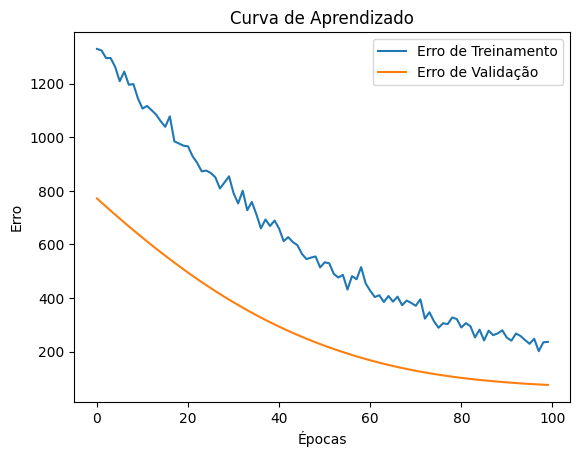

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Plotando a curva de aprendizado
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()
